# Dataset Description

- classes: edible=e, poisonous=p
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

pd.set_option('display.max_columns', None)

# Exploring the data

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color stalk-shape stalk-root  \
0            c         n          k           e          e   
1            c         b          k           e          c   
2            c         b          n           e          c   
3            c         n          n           e          e   
4            w         b          k           t          e   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                        s                        s                      w   
1                        s                        s                      w   
2                        s                        s                      w   
3                        s                        s                      w   
4                        s                        s                      w   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                      w         p          w           o         p   
1                      w         p          w           o         p   
2                      w         p          w           o         p   
3                      w         p          w           o         p   
4                      w         p          w           o         e   

  spore-print-color population habitat  
0                 k          s       u  
1                 n          n       g  
2                 n          n       m  
3                 k          s       u  
4                 n          a       g

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.describe()

class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color stalk-shape stalk-root  \
count          8124      8124       8124        8124       8124   
unique            2         2         12           2          5   
top               c         b          b           t          b   
freq           6812      5612       1728        4608       3776   

       stalk-surface-above-ring stalk-surface-below-ring  \
count                      8124                     8124   
unique                        4                        4   
top                           s                        s   
freq                       5176                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     4464                   4384      8124       7924   

       ring-number ring-type spore-print-color population habitat  
count         8124      8124              8124       8124    8124  
unique           3         5                 9          6       7  
top              o         p                 w          v       d  
freq          7488      3968              2388       4040    3148

# Analysis and Visualization

- Update columns with values for better visualization

In [5]:
class_mapping = {'e': 'edible', 'p': 'poisonous'}
cap_shape_mapping = {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'}
cap_surface_mapping = {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'}
cap_color_mapping = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'}
bruises_mapping = {'t': 'bruises', 'f': 'no'}
odor_mapping = {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'}
gill_attachment_mapping = {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'}
gill_spacing_mapping = {'c': 'close', 'w': 'crowded', 'd': 'distant'}
gill_size_mapping = {'b': 'broad', 'n': 'narrow'}
gill_color_mapping = {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'}
stalk_shape_mapping = {'e': 'enlarging', 't': 'tapering'}
stalk_root_mapping = {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'}
stalk_surface_above_ring_mapping = {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'}
stalk_surface_below_ring_mapping = {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'}
stalk_color_above_ring_mapping = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'}
stalk_color_below_ring_mapping = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'}
veil_type_mapping = {'p': 'partial', 'u': 'universal'}
veil_color_mapping = {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'}
ring_number_mapping = {'n': 'none', 'o': 'one', 't': 'two'}
ring_type_mapping = {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'}
spore_print_color_mapping = {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'}
population_mapping = {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'}
habitat_mapping = {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}

attribute_mappings = {
    'class': class_mapping,
    'cap-shape': cap_shape_mapping,
    'cap-surface': cap_surface_mapping,
    'cap-color': cap_color_mapping,
    'bruises': bruises_mapping,
    'odor': odor_mapping,
    'gill-attachment': gill_attachment_mapping,
    'gill-spacing': gill_spacing_mapping,
    'gill-size': gill_size_mapping,
    'gill-color': gill_color_mapping,
    'stalk-shape': stalk_shape_mapping,
    'stalk-root': stalk_root_mapping,
    'stalk-surface-above-ring': stalk_surface_above_ring_mapping,
    'stalk-surface-below-ring': stalk_surface_below_ring_mapping,
    'stalk-color-above-ring': stalk_color_above_ring_mapping,
    'stalk-color-below-ring': stalk_color_below_ring_mapping,
    'veil-type': veil_type_mapping,
    'veil-color': veil_color_mapping,
    'ring-number': ring_number_mapping,
    'ring-type': ring_type_mapping,
    'spore-print-color': spore_print_color_mapping,
    'population': population_mapping,
    'habitat': habitat_mapping,
}

for column, mapping in attribute_mappings.items():
    df[column] = df[column].replace(mapping)


In [6]:
df.isna().sum().sum()

0

C:\Users\Admin\AppData\Local\Temp\ipykernel_19952\3028279147.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\Admin\AppData\Local\Temp\ipykernel_19952\3028279147.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\Admin\AppData\Local\Temp\ipykernel_19952\3028279147.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\Admin\AppData\Local\Temp\ipykernel_19952\3028279147.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xtickla

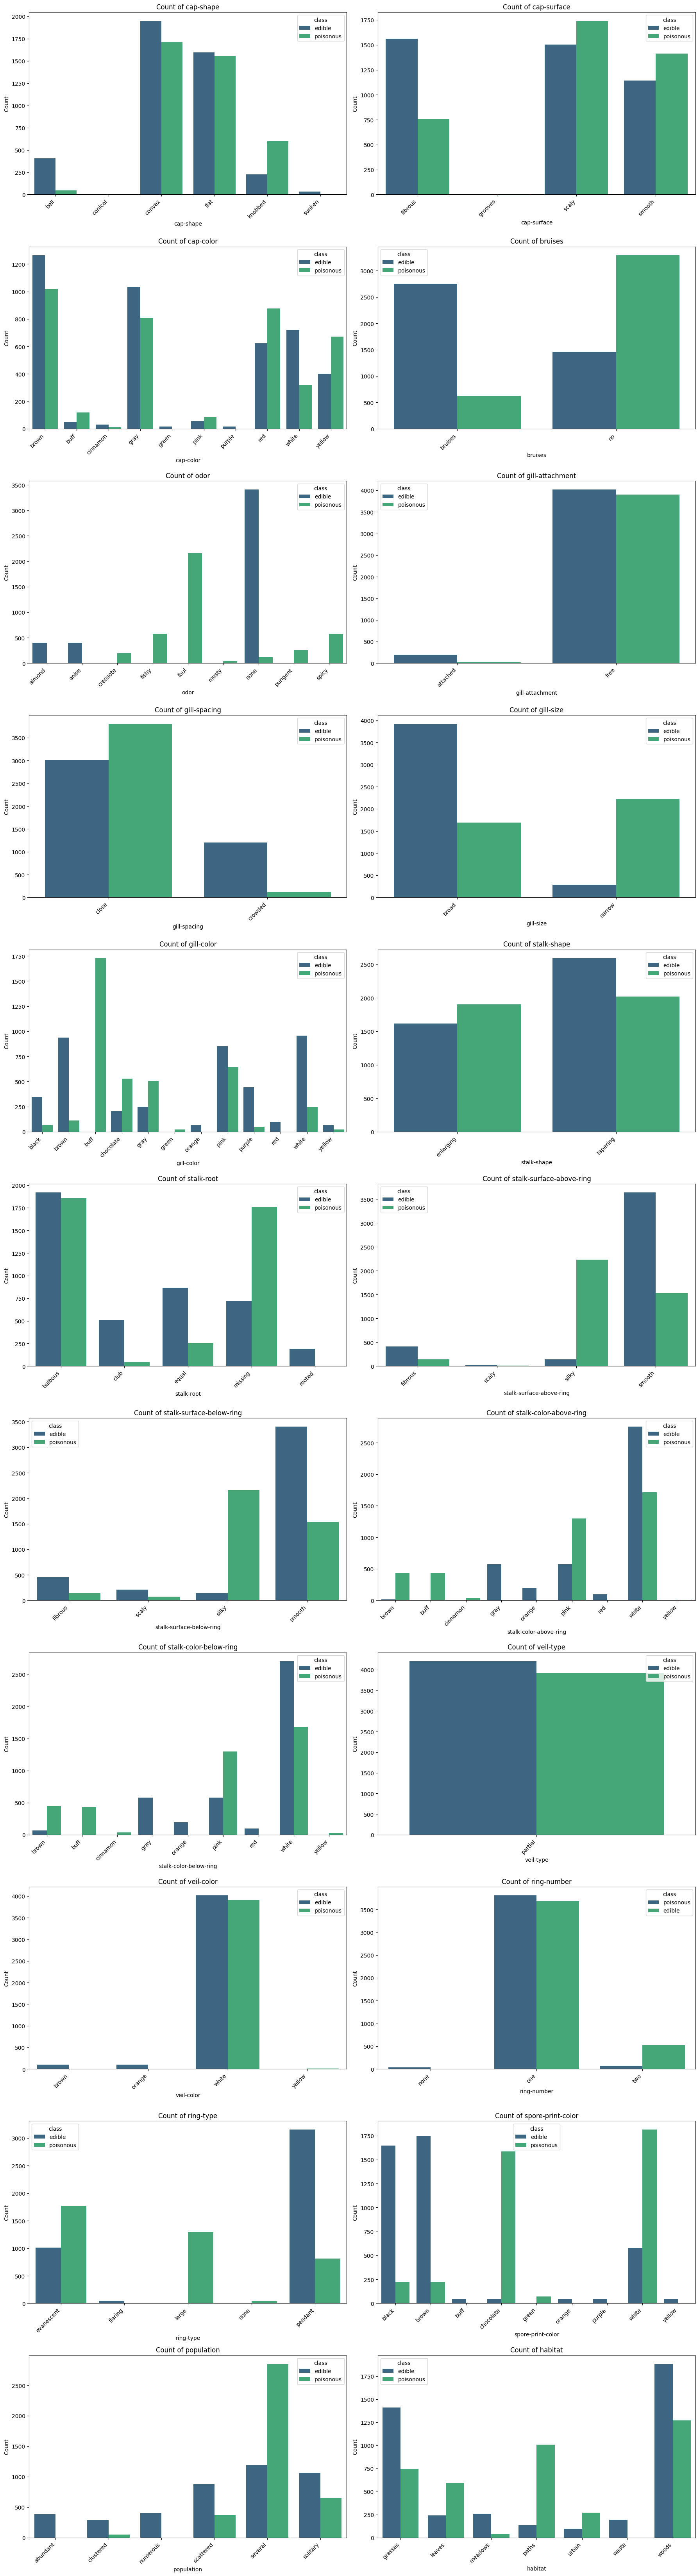

In [7]:
def plot_count(x,ax):
    group = df.groupby([f'{x}','class'])['class'].count().reset_index(name='Count')
    sns.barplot(data=group,x=x,y='Count',hue='class',palette='viridis',ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'Count of {x}')
cols = df.columns.tolist()
fig, axes = plt.subplots(11, 2, figsize=(18, 6 * 11))

for index,column in enumerate(cols[1:]):
    row = index // 2 
    col = index % 2
    ax = axes[row,col]
    plot_count(column, ax)
    
plt.tight_layout()
plt.show()

In [8]:
df.drop('veil-type',axis=1,inplace=True)
df = pd.get_dummies(df,dtype=float,drop_first=True)

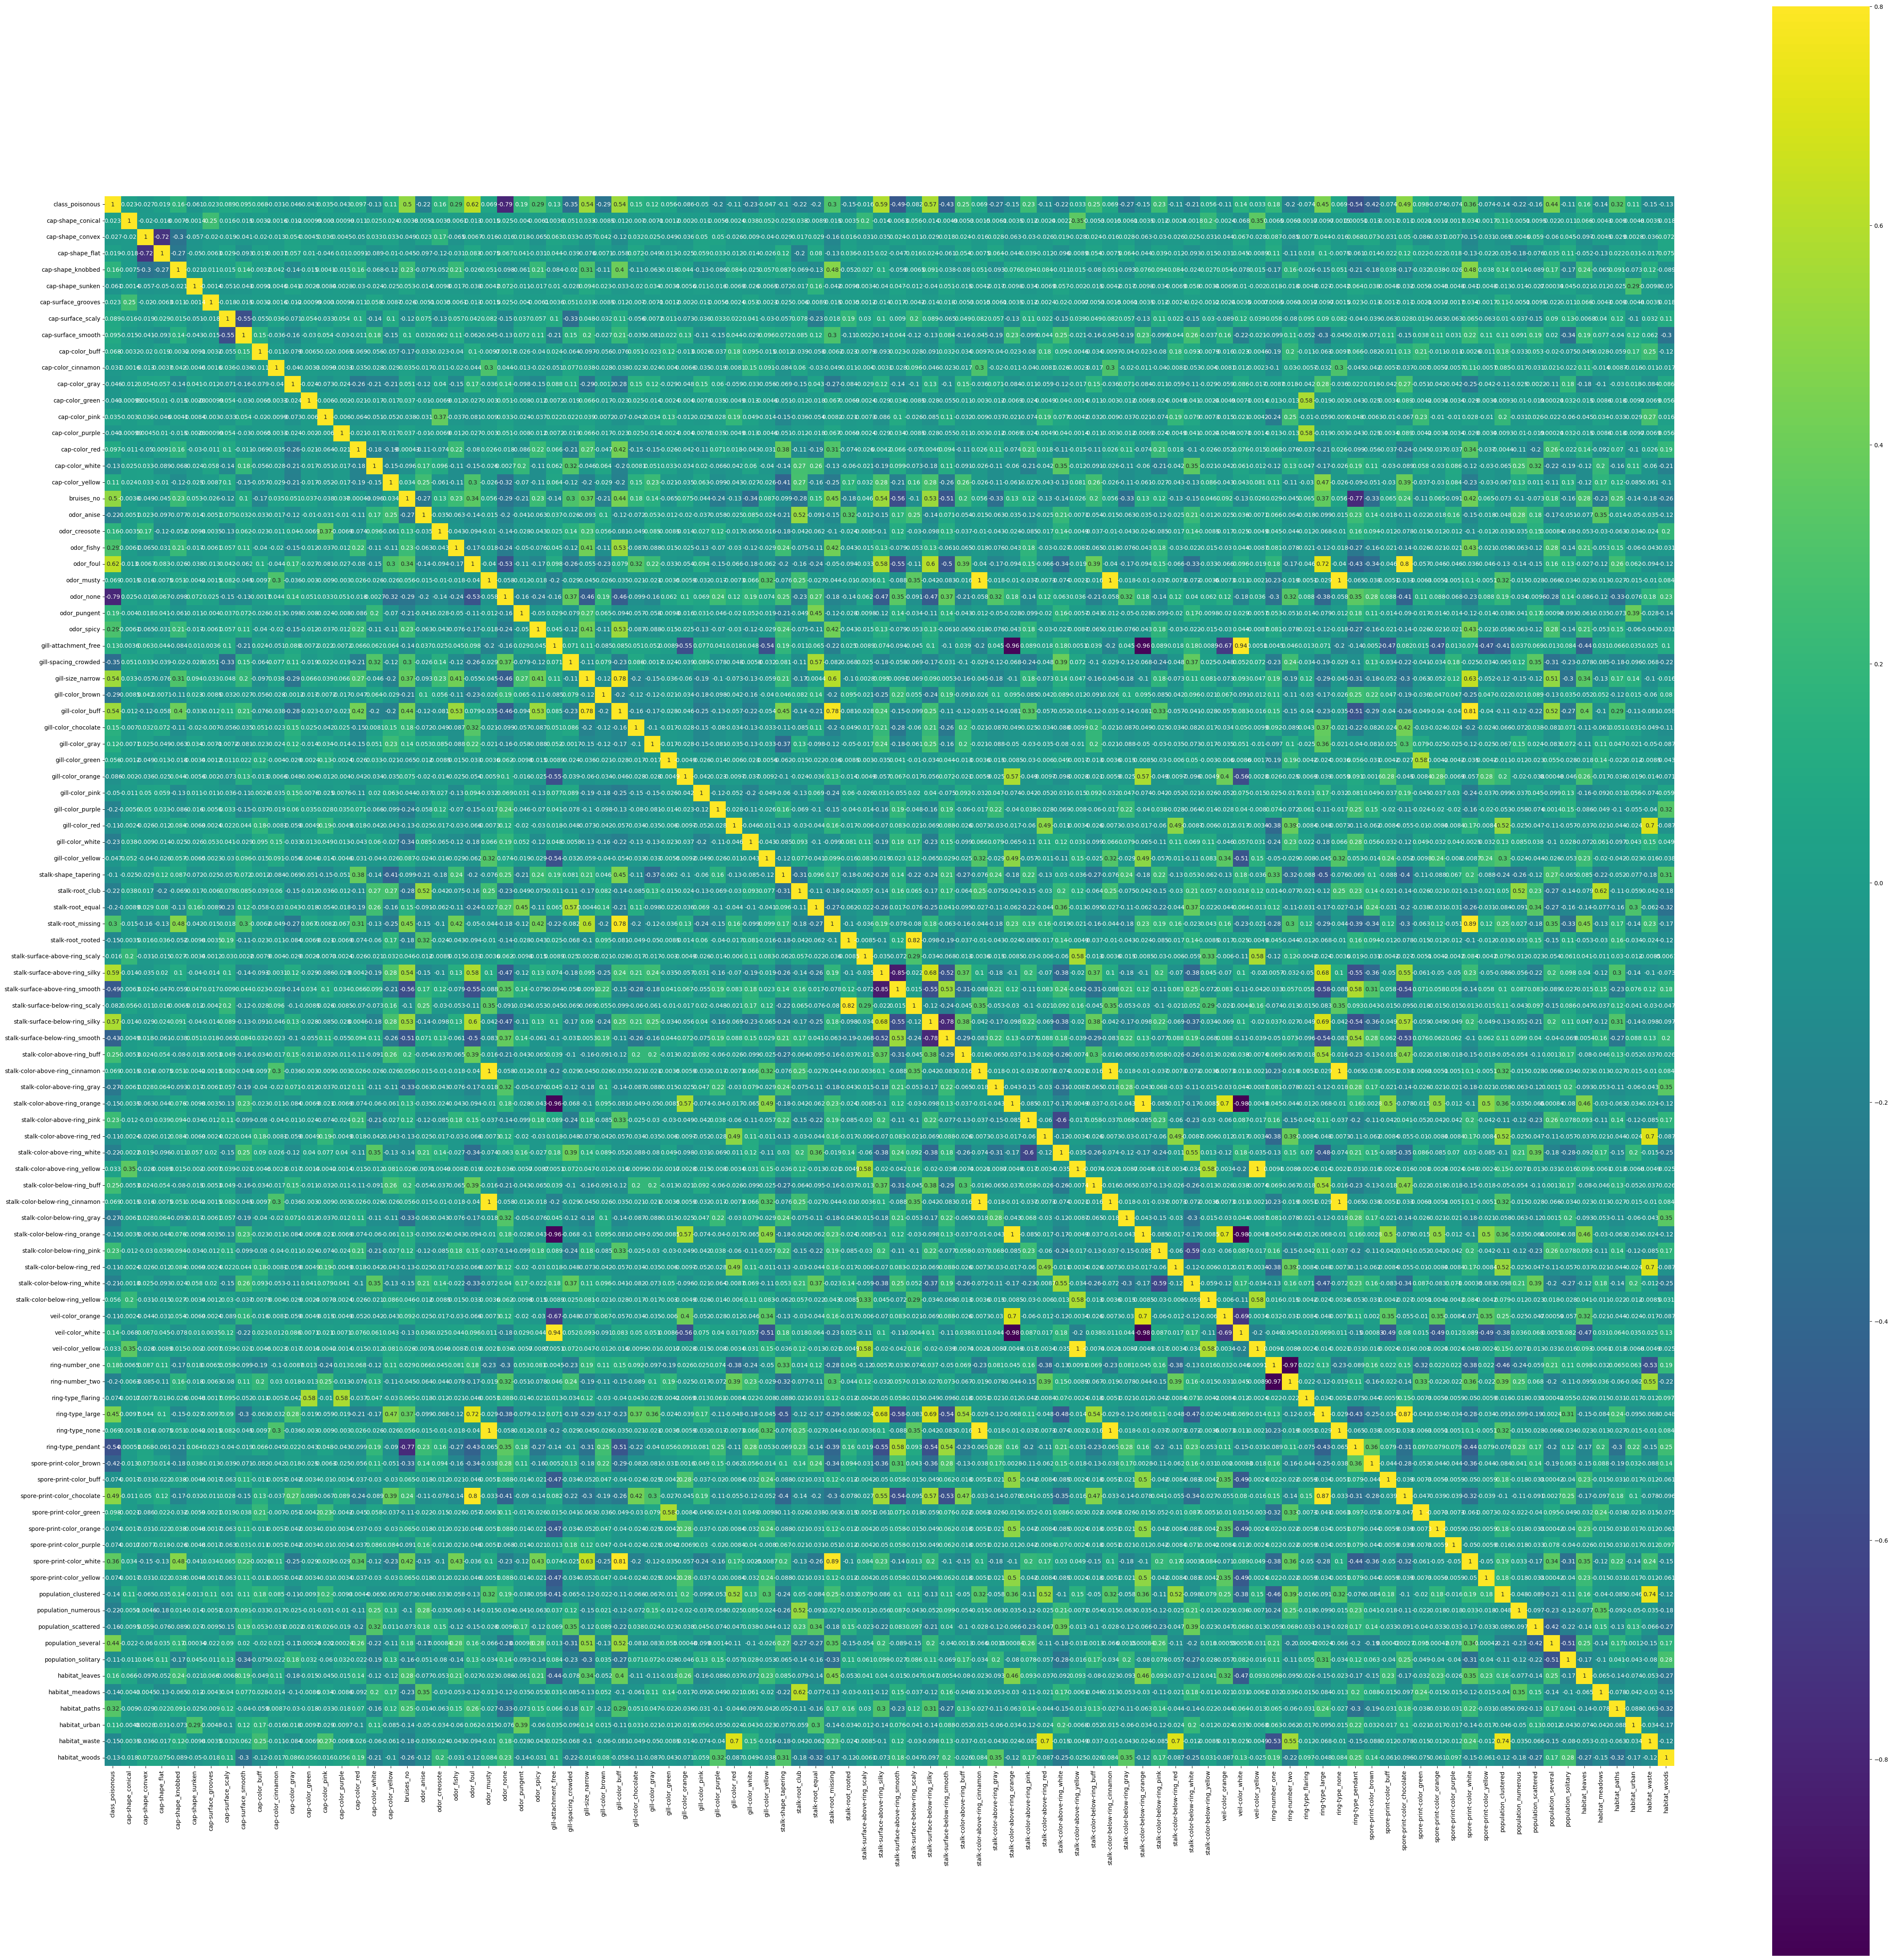

In [9]:
plt.figure(figsize=(60,60))
sns.heatmap(df.corr(),vmax=.8, annot=True,square=True,cmap='viridis');

# Data Preprocessing

- We already encoded the data

## Split the data

In [10]:
df.head()

class_poisonous  cap-shape_conical  cap-shape_convex  cap-shape_flat  \
0              1.0                0.0               1.0             0.0   
1              0.0                0.0               1.0             0.0   
2              0.0                0.0               0.0             0.0   
3              1.0                0.0               1.0             0.0   
4              0.0                0.0               1.0             0.0   

   cap-shape_knobbed  cap-shape_sunken  cap-surface_grooves  \
0                0.0               0.0                  0.0   
1                0.0               0.0                  0.0   
2                0.0               0.0                  0.0   
3                0.0               0.0                  0.0   
4                0.0               0.0                  0.0   

   cap-surface_scaly  cap-surface_smooth  cap-color_buff  cap-color_cinnamon  \
0                0.0                 1.0             0.0                 0.0   
1                0.0                 1.0             0.0                 0.0   
2                0.0                 1.0             0.0                 0.0   
3                1.0                 0.0             0.0                 0.0   
4                0.0                 1.0             0.0                 0.0   

   cap-color_gray  cap-color_green  cap-color_pink  cap-color_purple  \
0             0.0              0.0             0.0               0.0   
1             0.0              0.0             0.0               0.0   
2             0.0              0.0             0.0               0.0   
3             0.0              0.0             0.0               0.0   
4             1.0              0.0             0.0               0.0   

   cap-color_red  cap-color_white  cap-color_yellow  bruises_no  odor_anise  \
0            0.0              0.0               0.0         0.0         0.0   
1            0.0              0.0               1.0         0.0         0.0   
2            0.0              1.0               0.0         0.0         1.0   
3            0.0              1.0               0.0         0.0         0.0   
4            0.0              0.0               0.0         1.0         0.0   

   odor_creosote  odor_fishy  odor_foul  odor_musty  odor_none  odor_pungent  \
0            0.0         0.0        0.0         0.0        0.0           1.0   
1            0.0         0.0        0.0         0.0        0.0           0.0   
2            0.0         0.0        0.0         0.0        0.0           0.0   
3            0.0         0.0        0.0         0.0        0.0           1.0   
4            0.0         0.0        0.0         0.0        1.0           0.0   

   odor_spicy  gill-attachment_free  gill-spacing_crowded  gill-size_narrow  \
0         0.0                   1.0                   0.0               1.0   
1         0.0                   1.0                   0.0               0.0   
2         0.0                   1.0                   0.0               0.0   
3         0.0                   1.0                   0.0               1.0   
4         0.0                   1.0                   1.0               0.0   

   gill-color_brown  gill-color_buff  gill-color_chocolate  gill-color_gray  \
0               0.0              0.0                   0.0              0.0   
1               0.0              0.0                   0.0              0.0   
2               1.0              0.0                   0.0              0.0   
3               1.0              0.0                   0.0              0.0   
4               0.0              0.0                   0.0              0.0   

   gill-color_green  gill-color_orange  gill-color_pink  gill-color_purple  \
0               0.0                0.0              0.0                0.0   
1               0.0                0.0              0.0                0.0   
2               0.0                0.0              0.0                0.0   
3               0.0                0.0   

In [11]:
index_to_exclude = df.columns.get_loc('class_poisonous')
X = df.iloc[:, [i for i in range(df.shape[1]) if i != index_to_exclude]].values
y = df.iloc[:,index_to_exclude].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=329) 

# Logistic Regression

## Training the model

In [13]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

## Evaluating the model

Training Accuracy =  99.97  %
Testing Accuracy =  100.0  %


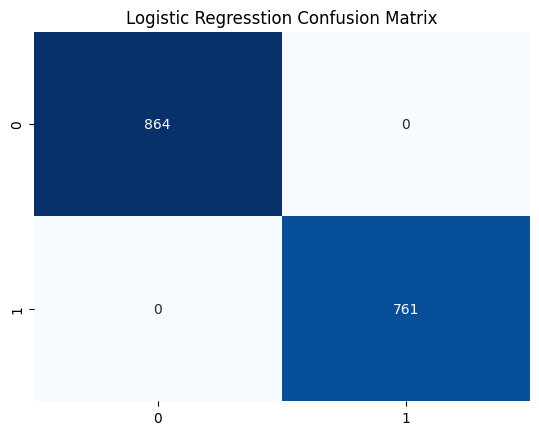

In [14]:
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
lr_train_acc = round(accuracy_score(y_train,lr.predict(X_train))*100,2)
lr_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Training Accuracy = ' , lr_train_acc,' %')
print('Testing Accuracy = ' , lr_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Logistic Regresstion Confusion Matrix');

# K-Nearest Neighbors

## Training the data

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

## Evaluating the model

C:\Users\Admin\PycharmProjects\ml-course\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Admin\PycharmProjects\ml-course\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Training Accuracy =  100.0  %
Testing Accuracy =  100.0  %


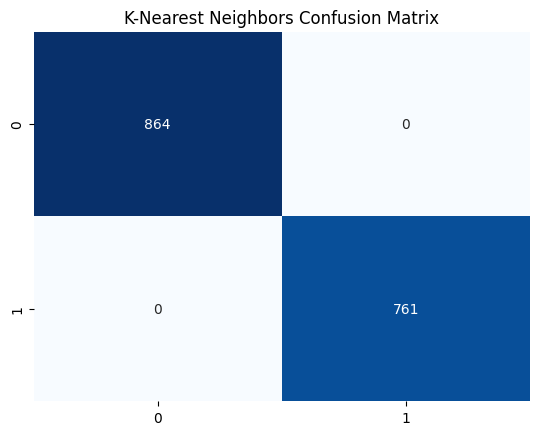

In [16]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
knn_train_acc = round(accuracy_score(y_train,knn.predict(X_train))*100,2)
knn_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Training Accuracy = ' , knn_train_acc,' %')
print('Testing Accuracy = ' , knn_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('K-Nearest Neighbors Confusion Matrix');

# Linear Support Vector Machine

## Training the model

In [17]:
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

## Evaluating the model

Training Accuracy =  100.0  %
Testing Accuracy =  100.0  %


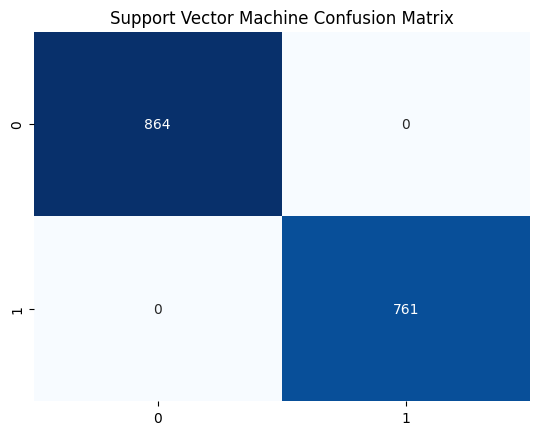

In [18]:
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
svm_train_acc = round(accuracy_score(y_train,svm.predict(X_train))*100,2)
svm_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Training Accuracy = ' , svm_train_acc,' %')
print('Testing Accuracy = ' , svm_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Support Vector Machine Confusion Matrix');

# Kernel Support Vector Machine

## Training the model

In [19]:
svm_kernel = SVC(kernel='rbf')
svm_kernel.fit(X_train,y_train)

SVC()

## Evaluating the model

Training Accuracy =  100.0  %
Testing Accuracy =  100.0  %


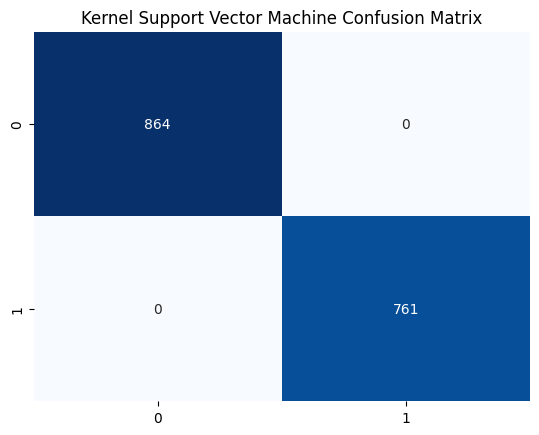

In [20]:
y_pred = svm_kernel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
svm_k_train_acc = round(accuracy_score(y_train,svm_kernel.predict(X_train))*100,2)
svm_k_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Training Accuracy = ' , svm_k_train_acc,' %')
print('Testing Accuracy = ' , svm_k_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Kernel Support Vector Machine Confusion Matrix');

# Naive Bayes

## Training the model

In [21]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

## Evaluating the model

Training Accuracy =  99.35  %
Testing Accuracy =  99.08  %


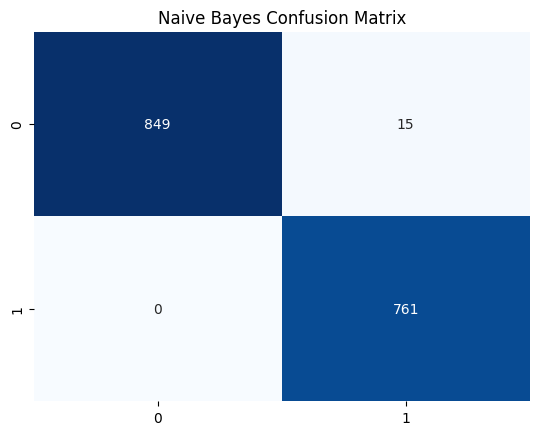

In [22]:
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
nb_train_acc = round(accuracy_score(y_train,nb.predict(X_train))*100,2)
nb_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Training Accuracy = ' , nb_train_acc,' %')
print('Testing Accuracy = ' , nb_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Naive Bayes Confusion Matrix');

# Comparing Models

In [23]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','K Nearest Neighbors','Linear Support Vector Machines',
        'Kernel Support Vector Machines', 'Gaussian Naive Bayes'
    ],
    'Training Accuracy': [
        lr_train_acc,knn_train_acc,svm_train_acc,svm_k_train_acc,nb_train_acc
    ],
    'Testing Accuracy': [
       lr_test_acc,knn_test_acc,svm_test_acc,svm_k_test_acc,nb_test_acc
    ]
})

In [24]:
models.sort_values(by=['Testing Accuracy','Training Accuracy'], ascending=False).style.background_gradient(
        cmap='coolwarm')